# K-NEAREST NEIGHBOURS

In [1]:
#imports Dataset

In [2]:
# KNN Classification - Supervised Machine Learning Algorithm used for both classification and regression
from pandas import read_csv
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

In [3]:
df=pd.read_csv("Zoo.csv")

In [4]:
df.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [5]:
#number of features
print ("Number of features : {}".format(len(df.columns.values)))
print ("Number of sample : {}".format(df.shape[0]))

Number of features : 18
Number of sample : 101


In [6]:
#let see if any cloumn has missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [7]:
df1=df.drop(['animal name'],axis=1)
df1

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


# Feature engineering usinf Recursive Feature Elimination and Feature importance ranking

In [8]:
features = df1.drop('type',axis=1)
target = df1.type
set(df1.type)

{1, 2, 3, 4, 5, 6, 7}

In [18]:
num_folds = 10
kfold = KFold(n_splits=num_folds)

In [23]:
from sklearn import metrics
from sklearn.ensemble import ExtraTreesClassifier

#define and fit a ExtraTreeClassifier to the data
model = ExtraTreesClassifier()
model.fit(features,target)

#display the feature importance
print(model.feature_importances_)
print('\n',features.columns.values)

[0.09859892 0.12159227 0.09713055 0.15744217 0.03617618 0.04083332
 0.01030011 0.08516175 0.08029305 0.07838553 0.00875439 0.06156811
 0.06641592 0.04956657 0.00034213 0.00743905]

 ['hair' 'feathers' 'eggs' 'milk' 'airborne' 'aquatic' 'predator' 'toothed'
 'backbone' 'breathes' 'venomous' 'fins' 'legs' 'tail' 'domestic'
 'catsize']


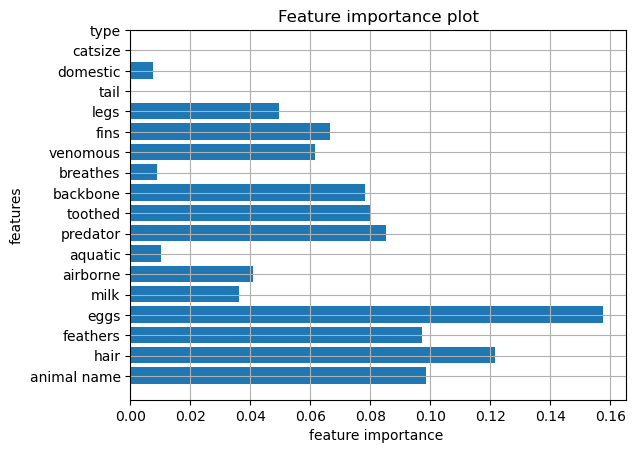

In [34]:
#bar plot of feature importance
import matplotlib.pyplot as plt
values = model.feature_importances_
pos = np.arange(16) + 0.02
plt.barh(pos,values,align = 'center')
plt.title('Feature importance plot')
plt.xlabel('feature importance ')
plt.ylabel('features')
plt.yticks(np.arange(18),('animal name', 'hair', 'feathers', 'eggs', 'milk', 'airborne','aquatic' ,'predator', 'toothed' ,'backbone', 'breathes','venomous', 'fins','legs','tail','domestic', 'catsize','type'))
plt.grid(True)

# Let's create training and testing datasets

Accuracy for 0 is 0.9230769230769231


Text(0, 0.5, 'Accuracy')

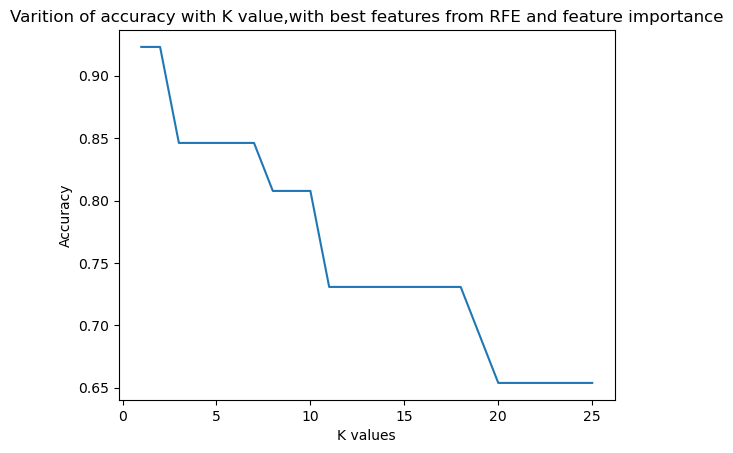

In [37]:
from sklearn.model_selection import train_test_split#updating features: combining best features from both RFE and feature importance
features = features[['tail','legs','fins','eggs','milk','hair']]

#here we have consider best features from both RFE and feature importance results

#spliting data into train and test data
X_train,X_test,y_train,y_test = train_test_split(features,target,random_state = 12)

from sklearn.neighbors import KNeighborsClassifier

k_values = np.arange(1,26)
scores = []

for i in k_values:
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(X_train,y_train)
    y_predict = clf.predict(X_test)
    scores.append(metrics.accuracy_score(y_test,y_predict))

print("Accuracy for {} is {}".format(np.argmax(scores),max(scores)))

plt.plot(np.arange(1,26),scores)
plt.title('Varition of accuracy with K value,with best features from RFE and feature importance')
plt.xlabel('K values')
plt.ylabel('Accuracy')

Accuracy for 0 is 0.9230769230769231


Text(0, 0.5, 'Accuracy')

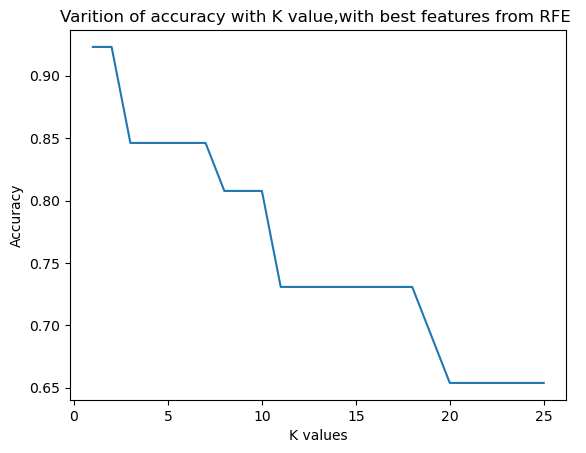

In [38]:
#Let's update features with the results of RFE and evaluate how
#accuracy varies

features1 = features[['tail','legs','fins','eggs','milk','hair']]

X_train,X_test,y_train,y_test = train_test_split(features1,target,random_state = 12)

from sklearn.neighbors import KNeighborsClassifier

k_values = np.arange(1,26)
scores = []

for i in k_values:
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(X_train,y_train)
    y_predict = clf.predict(X_test)
    scores.append(metrics.accuracy_score(y_test,y_predict))

print("Accuracy for {} is {}".format(np.argmax(scores),max(scores)))

plt.plot(np.arange(1,26),scores)
plt.title('Varition of accuracy with K value,with best features from RFE ')
plt.xlabel('K values')
plt.ylabel('Accuracy')

Accuracy for 2 is 0.7307692307692307


Text(0, 0.5, 'Accuracy')

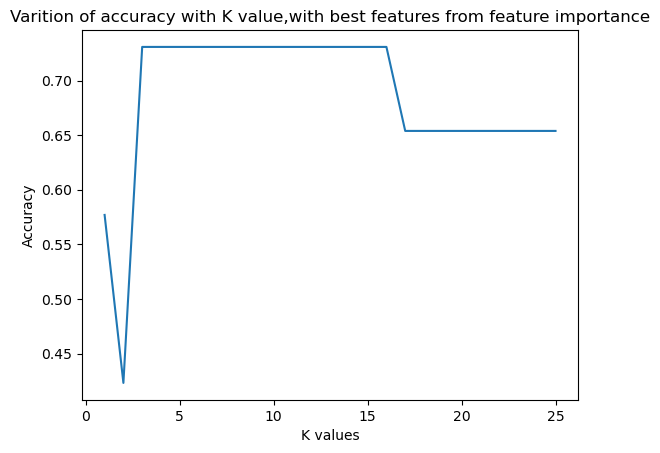

In [42]:
#Let's update features with the results of feature importance and evaluate how
#accuracy varies

features2 = features[['legs','tail']]

X_train,X_test,y_train,y_test = train_test_split(features2,target,random_state = 12)

from sklearn.neighbors import KNeighborsClassifier

k_values = np.arange(1,26)
scores = []

for i in k_values:
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(X_train,y_train)
    y_predict = clf.predict(X_test)
    scores.append(metrics.accuracy_score(y_test,y_predict))

print("Accuracy for {} is {}".format(np.argmax(scores),max(scores)))

plt.plot(np.arange(1,26),scores)
plt.title('Varition of accuracy with K value,with best features from feature importance')
plt.xlabel('K values')
plt.ylabel('Accuracy')